In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from collections import defaultdict

from utils.plot_config import *
mpl.rc('lines', linewidth=plot_line_width)
fontsize = fontsize * 1.3

In [2]:
def format_plot(ax):
    ax.legend(loc=1, prop={'size': fontsize})
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(plot_axis_line_width)
    ax.tick_params(width=plot_axis_line_width)
    ax.tick_params(axis='y', which='major', labelsize=fontsize*0.95)
    ax.tick_params(axis='x', which='major', labelsize=fontsize*1.2)
    ax.tick_params(axis='both', which='minor', labelsize=fontsize*0.8)
    

In [3]:
def create_barplot(ax, dataset_names, dataset_stats):
    x = np.arange(len(dataset_names))
    width = 0.3
    multiplier = 0
    bar_colors = [colors["color_0"], colors["color_1"]]
    for i, (attribute, measurement) in enumerate(dataset_stats.items()):
        measurement = np.array(measurement)
        offset = width * multiplier
        bars = ax.bar(x + offset, measurement, width, label=attribute, color=bar_colors[i%2])
        ax.bar_label(bars, labels=[f"{m:.4f}" for m in measurement], padding=0, fontsize=fontsize*0.85)
        multiplier += 1
    ax.set_ylabel('Ratio', fontsize=fontsize*1.2)
    ax.set_xticks(x + width/2, dataset_names)
    format_plot(ax)
    plt.show()

In [4]:
def load_dataset_stats(dataset_names):
    dataset_stats = defaultdict(list)
    file_path = "./data/results/rule_overlap"
    overlap_file_names = os.listdir(file_path)
    for dataset_name in dataset_names:
        overlap_file_name = next((fn for fn in overlap_file_names if dataset_name.lower() in fn), None)
        if overlap_file_name is None:
            raise ValueError(f"There is no matching overlap file for dataset: {dataset_name}")
        data = pd.read_csv(os.path.join(file_path, overlap_file_name), sep='\t')
        for i in range(len(data)):
            dataset_stats[data.iloc[i, data.columns.get_loc("method")]].append(data.iloc[i, data.columns.get_loc("overlap")])

    return dataset_stats

In [5]:
dataset_names = np.array(["Rees46", "Coveo", "Retailrocket"])
dataset_stats = load_dataset_stats(dataset_names)
dataset_stats_fig1 = {"Leave-one-out": dataset_stats["Leave-one-out"], "Time based": dataset_stats["Time based"]}
dataset_stats_fig2 = {"Leave-one-out: random": dataset_stats["Leave-one-out: random"], "Leave-one-out: time split": dataset_stats["Leave-one-out: time split"]}

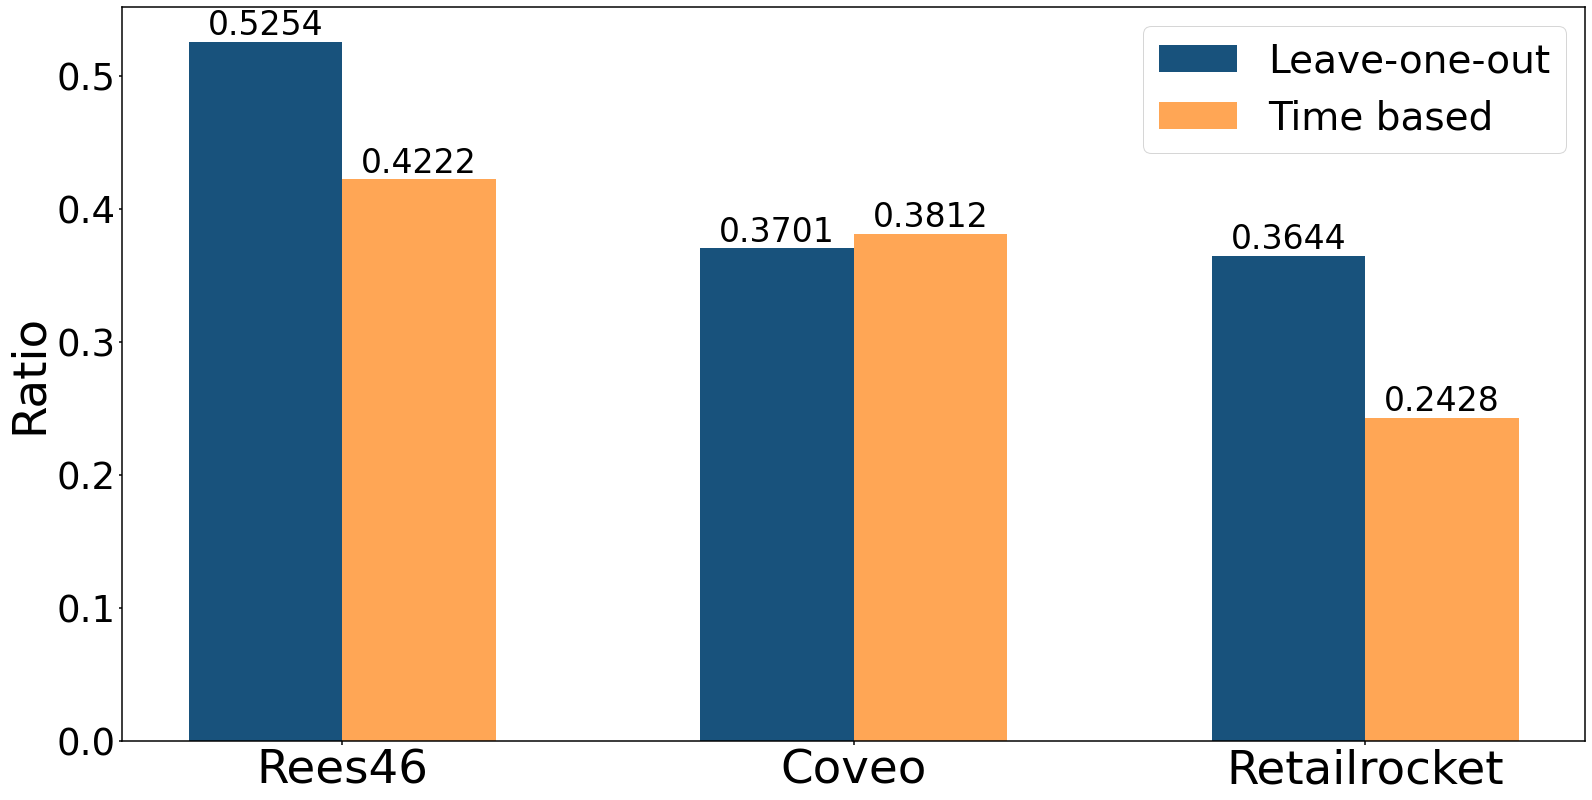

In [6]:
fig, ax = plt.subplots(figsize=(22,11), layout="constrained")
create_barplot(ax, dataset_names, dataset_stats_fig1)

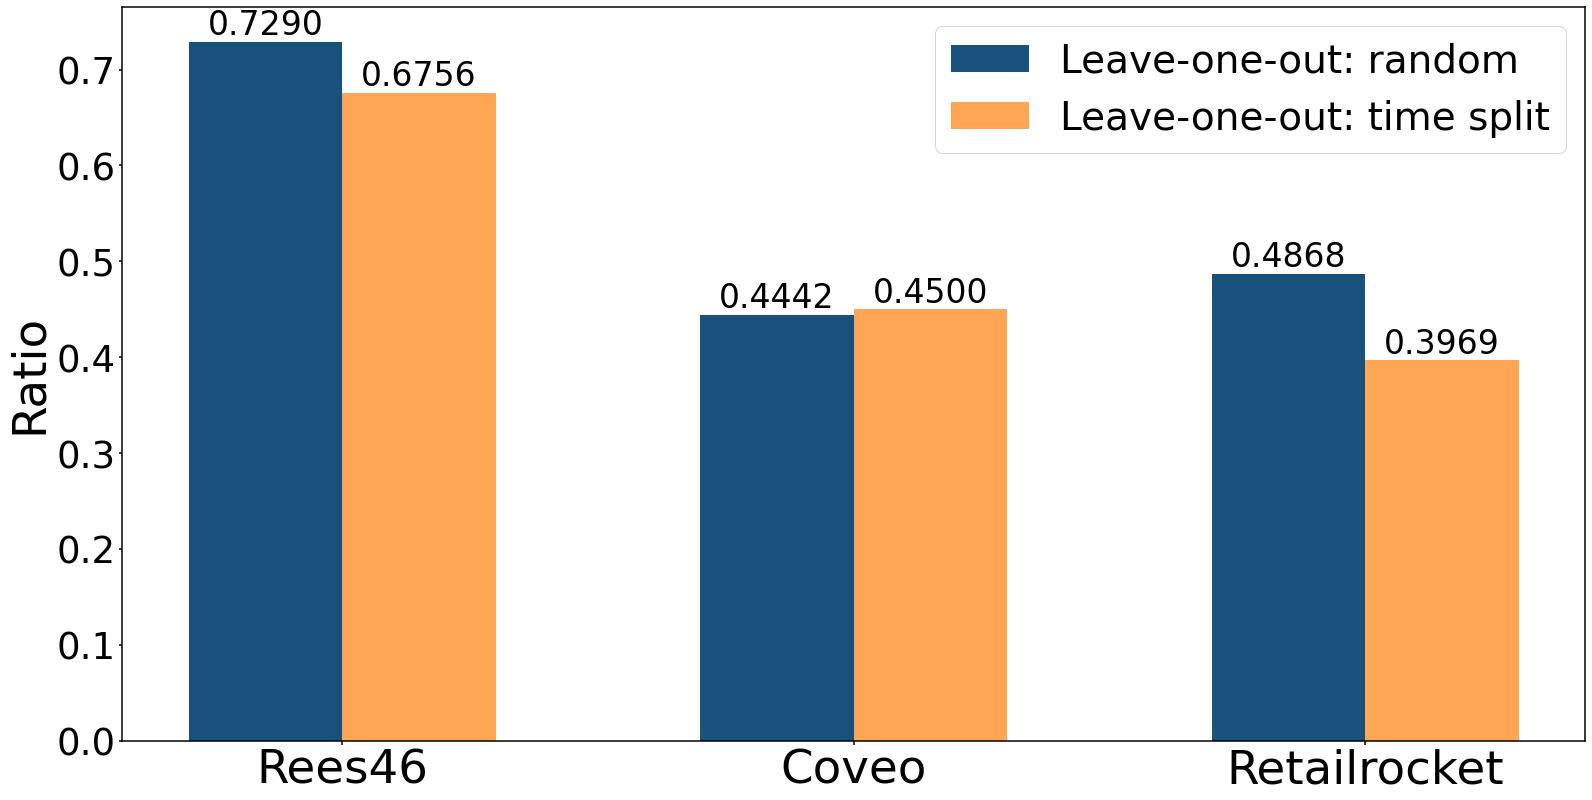

In [7]:
fig, ax = plt.subplots(figsize=(22,11), layout="constrained")
create_barplot(ax, dataset_names, dataset_stats_fig2)